In [1]:
import api

In [2]:
df_samples, df_counts, df_fpkm, df_fpkm_uq = api.get_data()
df_samples.shape

(1321, 17)

In [3]:
allowed_project_ids = list(df_samples['project id'].unique()[2:5])
df_samples, df_counts, df_fpkm, df_fpkm_uq = api.filter_data_by_column_value(df_samples, df_counts, df_fpkm, df_fpkm_uq, 'project id',      allowed_project_ids)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
nstd_by_column = {
        'average base quality': 2, 
        'proportion_base_mismatch': 2,
        'proportion_reads_mapped': 2
}

df_samples, df_counts, df_fpkm, df_fpkm_uq = api.apply_cutoffs(df_samples, df_counts, df_fpkm, df_fpkm_uq, nstd_by_column)

In [5]:
df_samples.shape

(1232, 17)

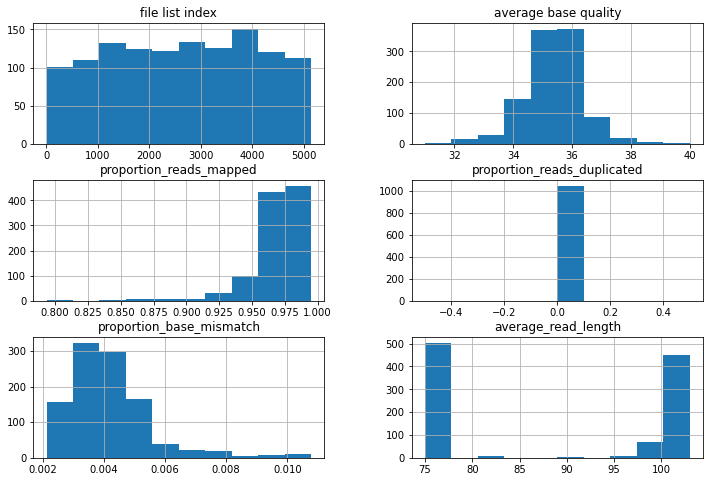

In [6]:
api.perform_eda(df_samples)

In [18]:
df_tpm = api.calculate_tpm(df_counts)

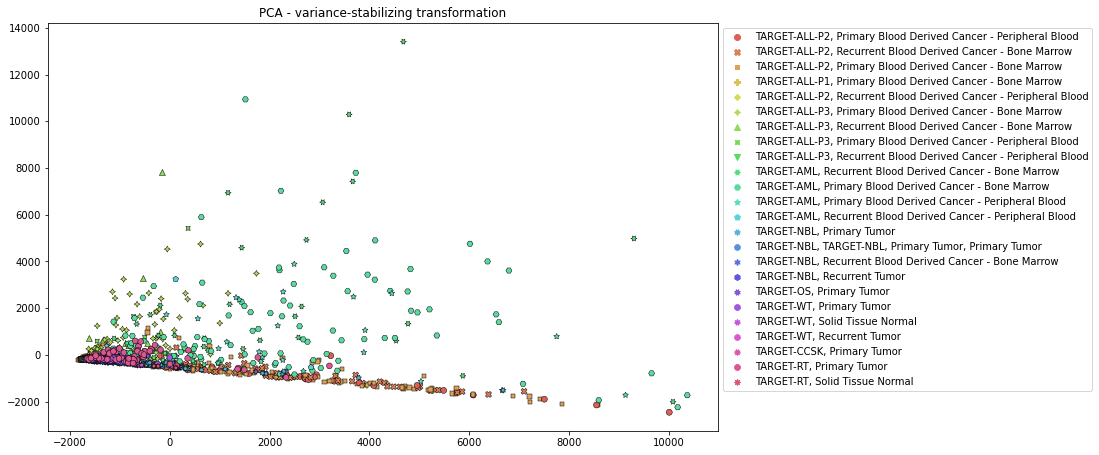

In [19]:
api.perform_pca(df_tpm, df_samples)

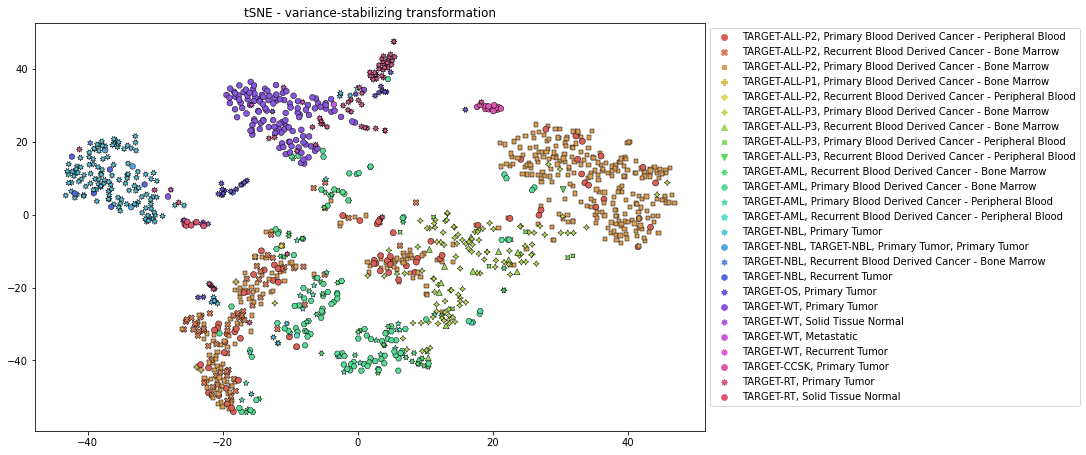

In [7]:
api.perform_tsne(df_tpm, df_samples)

In [7]:
df_samples.nunique()

file list index                1232
counts file name               1232
average base quality             10
file id                        1232
project id                       10
case id                        1103
sample type                       9
contamination_error               0
proportion_reads_mapped        1045
proportion_reads_duplicated       1
contamination                     0
proportion_base_mismatch       1045
state                             1
platform                          1
average_read_length              12
entity_submitter_id            1230
label 1                          25
dtype: int64

In [12]:
df_samples['sample type'].unique()

array(['Primary Blood Derived Cancer - Peripheral Blood',
       'Recurrent Blood Derived Cancer - Bone Marrow',
       'Primary Blood Derived Cancer - Bone Marrow',
       'Recurrent Blood Derived Cancer - Peripheral Blood',
       'Primary Tumor', 'Primary Tumor, Primary Tumor', 'Recurrent Tumor',
       'Solid Tissue Normal', 'Metastatic'], dtype=object)

In [20]:
import numpy as np
valid_ind = np.full((len(df_samples),), True)

In [21]:
valid_ind.shape

(1174,)

In [7]:
df_samples.shape, df_counts.shape, df_fpkm.shape, df_fpkm_uq.shape

((1232, 18), (1232, 60483), (1232, 60483), (1232, 60483))

Index(['ENSG00000000003.13', 'ENSG00000000005.5', 'ENSG00000000419.11',
       'ENSG00000000457.12', 'ENSG00000000460.15', 'ENSG00000000938.11',
       'ENSG00000000971.14', 'ENSG00000001036.12', 'ENSG00000001084.9',
       'ENSG00000001167.13',
       ...
       'ENSGR0000263980.4', 'ENSGR0000264510.4', 'ENSGR0000264819.4',
       'ENSGR0000265658.4', 'ENSGR0000270726.4', 'ENSGR0000275287.3',
       'ENSGR0000276543.3', 'ENSGR0000277120.3', 'ENSGR0000280767.1',
       'ENSGR0000281849.1'],
      dtype='object', name='id', length=60483)